# OBJECTIVE :

To build a predictive modeling algorithum to predict the mileage of vehicles

In [2]:
# libraries used
# for data preparation and analysis
import pandas as pd

# for creating plots
import matplotlib.pyplot as plt

# for distribution plot and heatmap
import seaborn as sns

#for creating training and test samples
from sklearn.model_selection import train_test_split

# for feature selection(to select significant features)
from sklearn.feature_selection import SelectKBest, f_regression

# for building linear regression model
from sklearn.linear_model import LinearRegression
# linear regression algorithm is mainly used for neumerical values , continous values (age,salary).
# it shows the relation ship between depended and independed variable

In [4]:
# import automobile data
df = pd.read_csv(r"D:\Data Science\Introtallent\python practice\Data Files used in Projects\automobile data.csv")

# understand the data

In [7]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Car_Name
0,8.0,8,307.0,130,3504,12.0,2015,1,chevrolet
1,15.0,8,350.0,165,3693,11.5,2015,1,buick
2,18.0,8,318.0,150,3436,11.0,2015,1,plymouth
3,16.0,8,304.0,150,3433,12.0,2015,1,amc
4,17.0,8,302.0,140,3449,10.5,2015,1,ford


In [9]:
# checking the column headers
df.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model_year', 'Origin', 'Car_Name'],
      dtype='object')

In [11]:
# checking the data type
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight            int64
Acceleration    float64
Model_year        int64
Origin            int64
Car_Name         object
dtype: object

# Variable Description

* Target Variable (y) : MPG (Mileage Per Gallon)
* independent Variables(x) :
    * 'Cylinders'
    * 'Displacement'
    * 'Horsepower'
    * 'Weight'
    * 'Acceleration'
    * 'Model_year'
    * 'Origin'
    * 'Car_Name'

In [15]:
# checking the dimension of data, shows the number of rows and columns
df.shape

(398, 9)

In [17]:
#hourse power is a numeric variable but in the df it is stored as object
#so, we need to change the data type of hoursepower
df['Horsepower'] = pd.to_numeric(df['Horsepower'],errors='coerce')
# error coerce converts the error value into nan

In [19]:
# checcking d types
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Model_year        int64
Origin            int64
Car_Name         object
dtype: object

In [21]:
df.describe()
# it shows the min, max, count

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.489447,5.454774,193.425879,104.469388,2970.424623,15.568090,2008.989950,1.572864
std,7.849757,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,8.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,2003.000000,1.000000
25%,17.125000,4.000000,104.250000,75.000000,2223.750000,13.825000,2006.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,2009.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,2012.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,2015.000000,3.000000


In [23]:
# to check for null values
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model_year      0
Origin          0
Car_Name        0
dtype: int64

In [25]:
# there are 6 missing values in the horsepower so replace it with median

In [27]:
df['Horsepower'] = df['Horsepower'].fillna(df['Horsepower'].median())

In [29]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model_year      0
Origin          0
Car_Name        0
dtype: int64

# check for outliers

to check for outliers we use the boxplot function.
so we import the boxplot function from matplotlib.pyplot as plt to check the outliers.
we check the outliers for numeric values

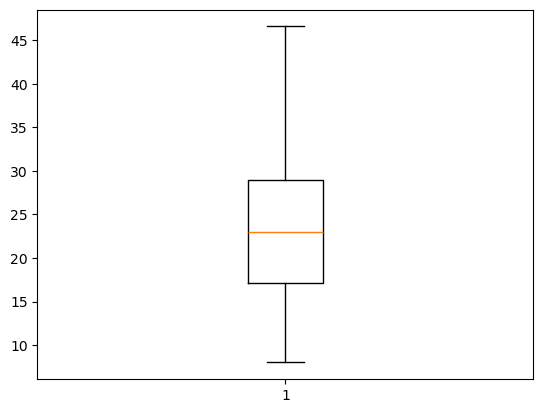

In [33]:
plt.boxplot(df['MPG'])
plt.show()
# has no outliers

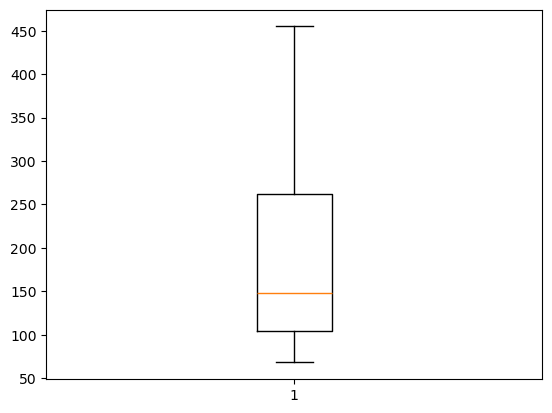

In [34]:
plt.boxplot(df['Displacement'])
plt.show()

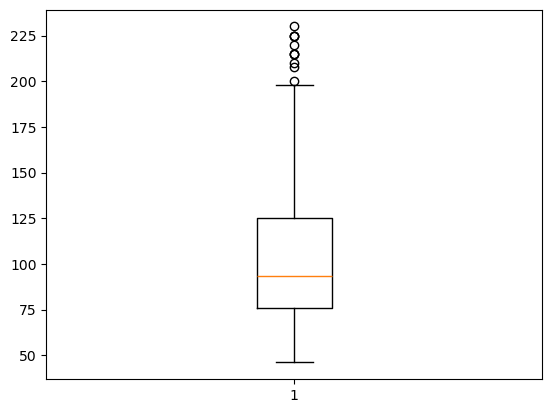

In [35]:
plt.boxplot(df['Horsepower']) #this has outliers
plt.show()
# here we could see the outliers

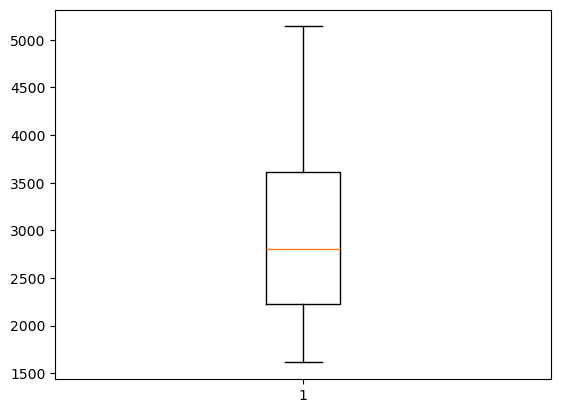

In [37]:
plt.boxplot(df['Weight']) # This has no outliers
plt.show()

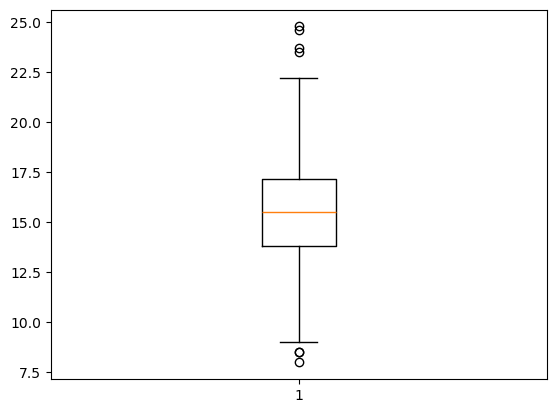

In [41]:
plt.boxplot(df['Acceleration']) # has outliers
plt.show()

there are outliers in horsepower and acceleration

so inorder to remove the outliers 
first we need to find the median in the given data and mark it as q2.
then we have to find the median of the q2 from left and right and mark it as q1 and q3.
so now we have 3 values q1,q2,q3.
then we have to find the iqr(inter quartile range) which is q3-q1.
then we have to find the ub(upper bound) and lb(lower bound).
ub = q3+1.5 * iqr
lb = q1-1.5 * iqr
so after finding ub and lb now we have to remove the outliers.
so the values lies above the ub(>ub) and less than lb(<lb) is considered as outliers.

In [45]:
#user defined function for outlier Treatment
def remove_outlier(d,c):
    # find q1 and q3
    q1 = d[c].quantile(0.25)
    q3 = d[c].quantile(0.75)

# calculate the iqr
    iqr = q3 - q1

#calculate upper bound (ub) and lower bound(lb)
    ub = q3+1.5 * iqr
    lb = q1-1.5 * iqr

#select good data and exclude outliers
    good_data = d[(d[c]>lb) & (d[c]<ub)]
    return good_data

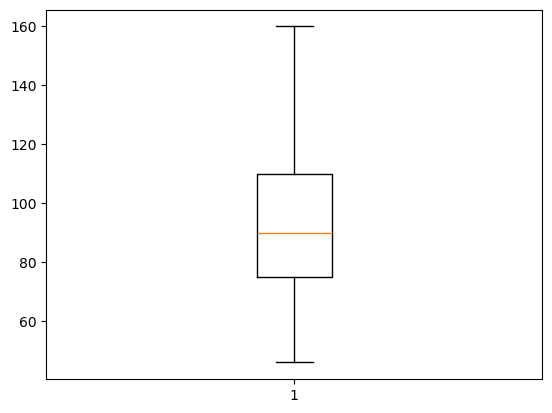

In [51]:
#remove outliers from Horsepower by calling remove_outlier function
df = remove_outlier(df,'Horsepower')
plt.boxplot(df['Horsepower'])
plt.show()

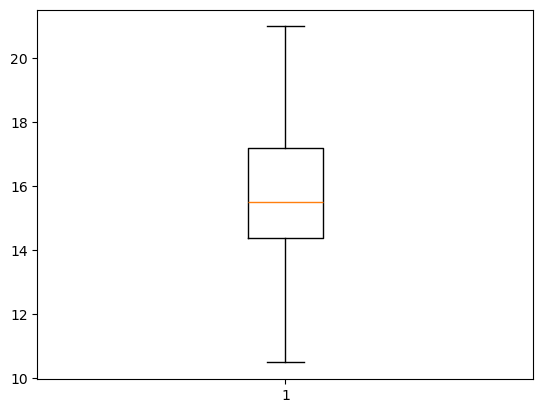

In [57]:
df = remove_outlier(df,'Acceleration')
plt.boxplot(df['Acceleration'])
plt.show()

In [59]:
df.shape

(348, 9)

# EDA (Exploratory Data Analysis)

* Distribution
* Data mix
* correlation
 ,EDA is like getting to know your data intimately before making any big moves—it lays the foundation for any solid analysis or predictive modeling.

In [63]:
df.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model_year', 'Origin', 'Car_Name'],
      dtype='object')

In [65]:
#'MPG''Displacement', 'Horsepower', 'Weight','Acceleration'

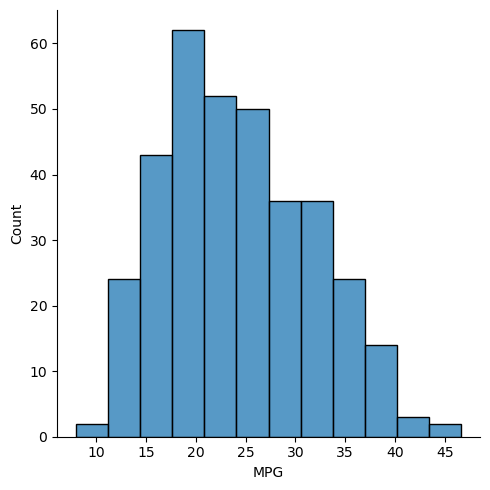

In [67]:
sns.displot(df['MPG'])
plt.show()

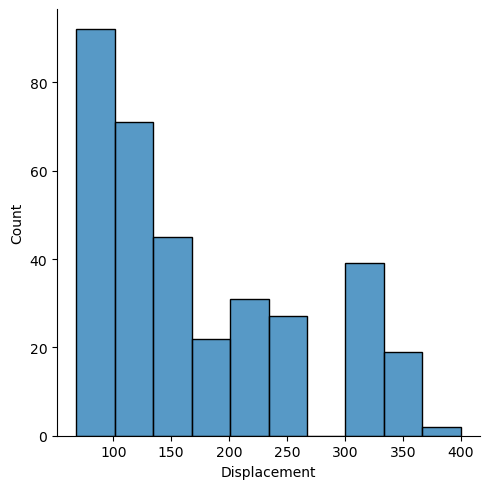

In [68]:
sns.displot(df['Displacement'])
plt.show()

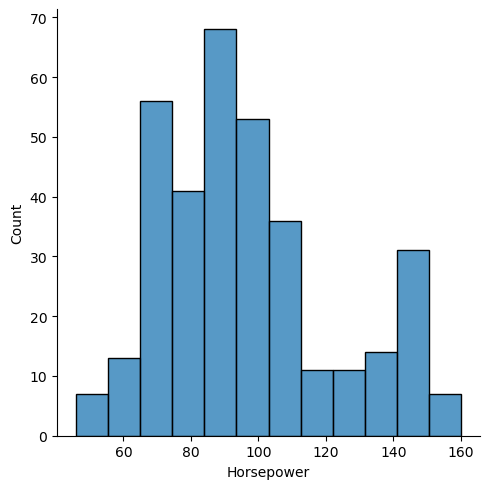

In [70]:
sns.displot(df['Horsepower'])
plt.show()

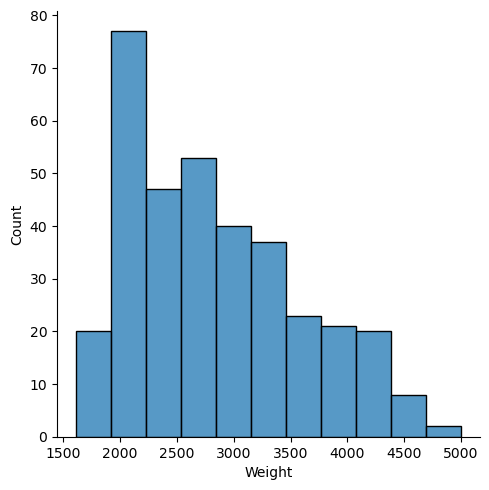

In [72]:
sns.displot(df['Weight'])
plt.show()

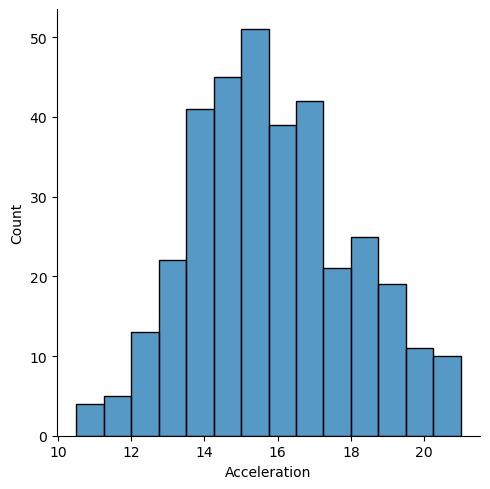

In [74]:
sns.displot(df['Acceleration'])
plt.show()

In [76]:
# Check datamix
# checking the data mix helps ensure the data accurately reflects the relationships between variables
# and the overall dataset structure. This is crucial for building robust models, 
# identifying potential biases, and ensuring that the data is suitable for the intended analysis or model. 

In [79]:
#cylinders,'Model_year', 'Origin','Car_Name'

<Axes: xlabel='Cylinders'>

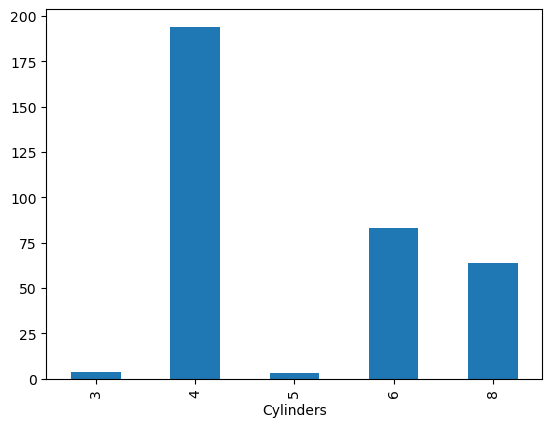

In [81]:
df.groupby('Cylinders')['Cylinders'].count().plot(kind='bar')

<Axes: xlabel='Model_year'>

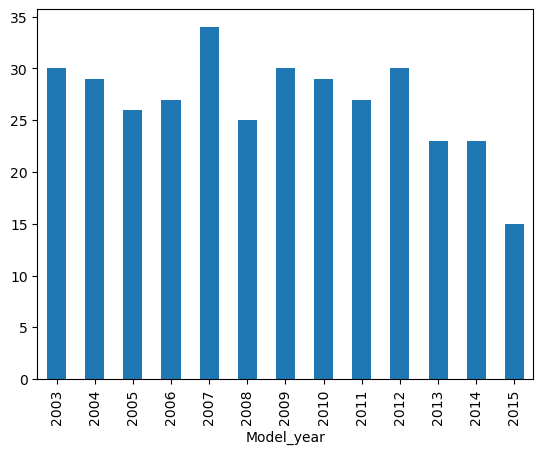

In [83]:
df.groupby('Model_year')['Model_year'].count().plot(kind = 'bar')

<Axes: xlabel='Origin'>

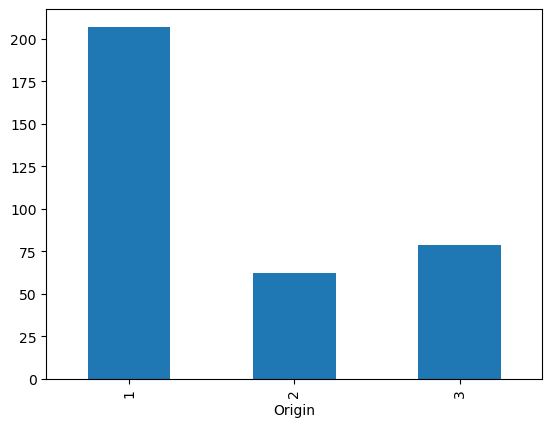

In [85]:
df.groupby('Origin')['Origin'].count().plot(kind = 'bar')

<Axes: xlabel='Car_Name'>

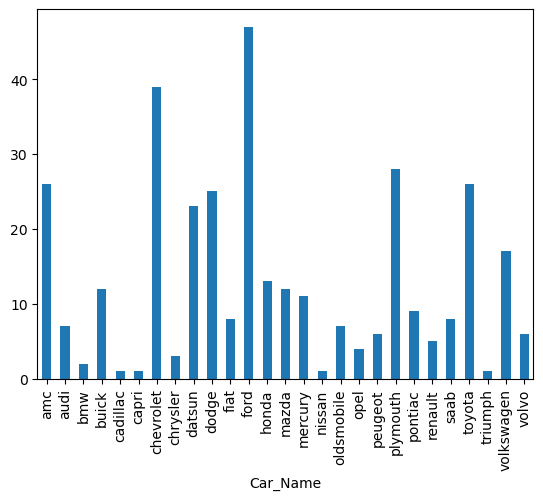

In [87]:
df.groupby('Car_Name')['Car_Name'].count().plot(kind = 'bar')

# Pearson Correlation

create a set of neumeric columns

In [91]:
df_numeric = df.select_dtypes(include = ['int32','int64','float32','float64'])
df_numeric.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin
0,8.0,8,307.0,130.0,3504,12.0,2015,1
2,18.0,8,318.0,150.0,3436,11.0,2015,1
3,16.0,8,304.0,150.0,3433,12.0,2015,1
4,17.0,8,302.0,140.0,3449,10.5,2015,1
14,24.0,4,113.0,95.0,2372,15.0,2015,3


here in the given numeric variable some of them are catagorical
Cylinders , Model_year , Origin
so we have to drop those catagorical columns

In [94]:
df_numeric = df_numeric.drop(['Cylinders','Model_year','Origin'],axis = 1)
df_numeric.head()

,MPG,Displacement,Horsepower,Weight,Acceleration
0,8.0,307.0,130.0,3504,12.0
2,18.0,318.0,150.0,3436,11.0
3,16.0,304.0,150.0,3433,12.0
4,17.0,302.0,140.0,3449,10.5
14,24.0,113.0,95.0,2372,15.0


here we have given axis =1 to delete the entire column of the selected data.
if we had to delete only a particular data of that column we could have used axis  = 0 wihich selects the row.

# creating the heat map

Heatmap data visualization is a powerful tool used to represent numerical data graphically,
where values are depicted using colors. 
This method is particularly effective for identifying patterns, trends, and anomalies within large datasets.

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

<Axes: >

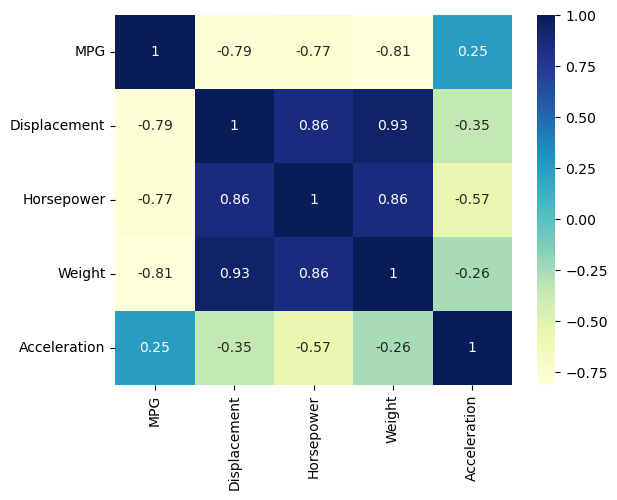

In [99]:
sns.heatmap(df_numeric.corr(),cmap='YlGnBu', annot=True)

..................End of EDA .................

# Dummy Conversion (One-hot encoding)

In [119]:
# One-hot encoding, also known as dummy conversion, 
# is used in Python machine learning to convert categorical data into a numerical format that machine learning algorithms
# can understand and process effectively.

In [ ]:
#remove model year as it dosen't signify anything in terms of impact on target variable
df = df.drop('Model_year', axis = 1)

In [125]:
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Origin            int64
Car_Name         object
dtype: object

In [127]:
# here cylinders and Origin is a neumerical variable but it should be a catagorical variable.
# so we have to convert both of them to catagorical.
df['Cylinders'] = df['Cylinders'].astype('object') # converting neumerical data to object
df['Origin'] = df['Origin'].astype('object')

In [129]:
df.dtypes

MPG             float64
Cylinders        object
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Origin           object
Car_Name         object
dtype: object

In [131]:
#Create a new df to store categorical variables for dummy conversion
df_catagorical = df.select_dtypes(include = 'object')
df_catagorical.head()

,Cylinders,Origin,Car_Name
0,8,1,chevrolet
2,8,1,plymouth
3,8,1,amc
4,8,1,ford
14,4,3,toyota


In [133]:
df_dummy = pd.get_dummies(df_catagorical,drop_first = True)
df_dummy.head()

,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Origin_2,Origin_3,Car_Name_audi,Car_Name_bmw,Car_Name_buick,Car_Name_cadillac,...,Car_Name_opel,Car_Name_peugeot,Car_Name_plymouth,Car_Name_pontiac,Car_Name_renault,Car_Name_saab,Car_Name_toyota,Car_Name_triumph,Car_Name_volkswagen,Car_Name_volvo
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


* Q: Why do we remove the first column of encoded variable(in dummy conversion)?
* Ans :
  * 1)Removing the first column dosen't impact the output because absence of all other variables represent the presence of the first one.
  * 2) it also eliminates the risk of multicolinearity.

In [137]:
#combine data from df_numeric and df_dummy
df_final = pd.concat([df_numeric,df_dummy],axis = 1)
df_final.head()
# export the final data to excel
df_final.to_excel(r"D:\Data Science\Introtallent\python practice\ML Projects\vehicle_mileage.xlsx")

# training the algorithum using the prepared data set

In [154]:
# create x and y
x = df_final.drop('MPG',axis = 1)
y = df_final['MPG']

In [156]:
# training and testing
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,train_size = 0.7, random_state = 0)

In [158]:
# checking the sample size
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(243, 36) (105, 36) (243,) (105,)


# Feature Selection

In [ ]:
# In machine learning, feature selection is the process of selecting a subset of relevant features (or variables) from an original dataset
# to build a model. The goal is to identify and retain the most informative features while discarding those that are irrelevant, redundant, or noisy. 
# This helps improve model performance, 0
# reduce overfitting, and enhance generalization. it is also the process of selecting significant features.

In [161]:
# select the key_features object to select the top k features
# to select the 5 significant features
key_features = SelectKBest(score_func = f_regression, k=5)

#fit the key_features to the training data and transform it
xtrain_selected = key_features.fit_transform(xtrain,ytrain)

#get the indices of the selected features
selected_indices = key_features.get_support(indices=True)

# Get the names of the selected feature
selected_features = xtrain.columns[selected_indices]

In [163]:
#print the significant variables
selected_features

Index(['Displacement', 'Horsepower', 'Weight', 'Cylinders_4', 'Cylinders_8'], dtype='object')

# Build Linear Regression Model

In [ ]:
# Regression is used to understand the relationship between 2 variables.
# Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables.
# it is maily used for find the relation between the continous variables.

# train model using selected Features

In [167]:
# initialise the linear regression model
linreg = LinearRegression()

# fit the model using training dataset
linreg.fit(xtrain_selected,ytrain)

#print the accuracy (R-squarred) of training model
linreg.score(xtrain_selected,ytrain)

0.6897771260647163

# Test the model built above (using xtest_selected)

In [170]:
# create xtest_selected using the selected features
xtest_selected = xtest.iloc[:,selected_indices]

# Predict MPG

In [173]:
# predict the mileage based on xtest
predicted_mpg = linreg.predict(xtest_selected)

# check accuracy of the model
linreg.score(xtest_selected,ytest)

C:\Users\aparn\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\aparn\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.7313882176371755

In [ ]:
# Q) what was the accuracy of the model
# ans) my model has an accuracy of 0.7
#follow up qs
# Q) so what do you think is this a good accuracy
# ans) yes, this accuracy is good for the given sample.the sample size was 388 rows and 15 columns.  

In [175]:
# print the predicted mileage
import numpy as np
predicted_mpg

array([21.90668297, 24.32579999, 25.48870519, 12.58344026, 32.85011582,
       18.80717225, 30.51109153, 27.734928  , 20.29619105, 31.1798268 ,
       30.96720392, 19.8697733 , 27.62288236, 29.9678766 , 21.82783685,
       26.20384543, 27.35699701, 20.51037346, 17.81197754, 30.61786128,
       18.72319385, 31.06151534, 31.13648902, 12.30825506, 29.3682807 ,
       19.69072813, 29.10390319, 25.39495392, 28.60445756, 17.10309802,
       15.7157347 , 29.20446272, 26.10729179, 29.52828856, 30.37963239,
       17.44489876, 26.6862488 , 14.75336405, 27.69812068, 18.80384234,
       24.40023411, 32.61547693, 31.3566412 , 15.47039486, 17.41541304,
       15.42439897, 18.22059711, 29.78792362, 24.27958852, 30.24838447,
       20.87945681, 27.37051605, 30.66552535, 23.44797293, 12.60073653,
       32.42635791, 14.33136526, 26.56892936, 10.81412898, 29.59628012,
       21.07168081, 30.17658717, 28.12207227, 32.65948424, 25.36401207,
       14.24544806, 22.33150421, 21.12171629, 17.41872789, 15.98

In [177]:
#print 80
print(linreg.intercept_)

40.64814156979033


In [179]:
#print Beta values
linreg.coef_

array([-0.0099047 , -0.07703114, -0.00335198,  3.33498323,  2.43240081])

In [181]:
xtest_selected.columns

Index(['Displacement', 'Horsepower', 'Weight', 'Cylinders_4', 'Cylinders_8'], dtype='object')